In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C
import tensorflow as tf
import pickle

2024-09-22 18:09:18.881284: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
#tf.test.is_gpu_available()

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/'
CAPATHS = {
    'CA_ESUS3': '/raid/mpsych/CACTAS/DATA/CA_ESUS3',
    'CA_CEA5': '/raid/mpsych/CACTAS/DATA/CA_CEA5',
    'CA_CAS5': '/raid/mpsych/CACTAS/DATA/CA_CAS5'
}

In [5]:
images, labels = C.Helper.load_datas(DATAPATH)

In [6]:
len(images), len(labels)

(114, 114)

In [7]:
masks = C.Helper.load_seg_datas(DATAPATH)

In [8]:
len(masks)

113

In [9]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patient_masks(images, labels, masks)

In [10]:
len(X_train), len(X_test)

(90, 24)

In [11]:
# with open('unet_28/train_patient_order.pkl', 'wb') as f:
#     pickle.dump(X_train, f)
# with open('unet_28/test_patient_order.pkl', 'wb') as f:
#     pickle.dump(X_test, f)

In [12]:
X_train, y_train, X_test, y_test = C.Helper.normalize_images_and_labels(DATAPATH, X_train, y_train, X_test, y_test)

In [13]:
m_train, m_test = C.Helper.normalize_masks(CAPATHS, m_train, m_test)

Invalid file path: None. Creating an empty mask.


In [14]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

18881


In [15]:
len(X_train), len(y_train), len(X_test), len(y_test)

(90, 90, 24, 24)

In [16]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(23412, 512, 512, 1) (23412, 512, 512, 1) (4750, 512, 512, 1) (4750, 512, 512, 1)


In [17]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(23412, 512, 512, 1) (4750, 512, 512, 1)


In [18]:
len(X_test), len(m_test)

(4750, 4750)

In [19]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
m_train = m_train.astype(np.float32)
m_test = m_test.astype(np.float32)

In [20]:
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [21]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(23412, 512, 512, 1) (4750, 512, 512, 1)


In [22]:
# for i in range(200):
#     plt.imshow(train_images_array[i])
#     plt.imshow(y_train[i], cmap='jet', alpha=0.5)
#     plt.show()

In [23]:
# for i in range(200):
#     plt.imshow(test_images_array[i])
#     plt.imshow(y_test[i], cmap='jet', alpha=0.5)
#     plt.show()

In [24]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [25]:
X_train_set.shape, y_train_set.shape, X_val.shape, y_val.shape

((18881, 512, 512, 1),
 (18881, 512, 512, 1),
 (4531, 512, 512, 1),
 (4531, 512, 512, 1))

In [26]:
# for i in range(200):
#     plt.imshow(X_train_set[i])
#     plt.imshow(y_train_set[i], cmap='jet', alpha=0.5)
#     plt.show()

In [27]:
# for i in range(200):
#     plt.imshow(X_val[i])
#     plt.imshow(y_val[i], cmap='jet', alpha=0.5)
#     plt.show()

In [28]:
X_train_set.dtype, y_train_set.dtype, X_val.dtype, y_val.dtype

(dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'))

In [29]:
X_test.shape, y_test.shape, X_test.dtype, y_test.dtype

((4750, 512, 512, 1), (4750, 512, 512, 1), dtype('float32'), dtype('float32'))

In [30]:
model = C.Helper.create_unet(X_train_set[0].shape)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


2024-09-22 18:15:09.289468: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-09-22 18:15:09.780193: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.39GiB deviceMemoryBandwidth: 1.41TiB/s
2024-09-22 18:15:09.789013: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:0f:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.39GiB deviceMemoryBandwidth: 1.41TiB/s
2024-09-22 18:15:09.789038: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-09-22 18:15:09.804346: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.

In [31]:
# model.save('unet_28/unet_model.h5')

In [32]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2024-09-22 18:15:18.867555: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-09-22 18:15:18.886566: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245750000 Hz


Epoch 1/200


2024-09-22 18:15:20.535423: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-09-22 18:15:21.723993: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-09-22 18:15:23.242774: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-09-22 18:15:23.242798: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-09-22 18:15:23.243762: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-09-22 18:15:23.328606: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-09-22 18:15:24.792687: I tensorflow/stream_exec

1180/1180 [==============================] - 549s 453ms/step - loss: 0.9979 - iou: 0.0011 - iou_thresholded: 0.0013 - val_loss: 1.0000 - val_iou: 0.8545 - val_iou_thresholded: 0.8794
Epoch 2/200
1180/1180 [==============================] - 540s 456ms/step - loss: 0.9560 - iou: 0.0372 - iou_thresholded: 0.0431 - val_loss: 0.9677 - val_iou: 0.6803 - val_iou_thresholded: 0.7751
Epoch 3/200
1180/1180 [==============================] - 538s 456ms/step - loss: 0.9204 - iou: 0.0934 - iou_thresholded: 0.1003 - val_loss: 0.9581 - val_iou: 0.7962 - val_iou_thresholded: 0.7961
Epoch 4/200
1180/1180 [==============================] - 538s 456ms/step - loss: 0.8976 - iou: 0.0824 - iou_thresholded: 0.0844 - val_loss: 0.9797 - val_iou: 0.5695 - val_iou_thresholded: 0.8409
Epoch 5/200
1180/1180 [==============================] - 538s 456ms/step - loss: 0.8749 - iou: 0.1033 - iou_thresholded: 0.1034 - val_loss: 0.9693 - val_iou: 0.8343 - val_iou_thresholded: 0.8347
Epoch 6/200
1180/1180 [==============

Epoch 43/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.5971 - iou: 0.4262 - iou_thresholded: 0.4262 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 44/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6174 - iou: 0.4061 - iou_thresholded: 0.4061 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 45/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6022 - iou: 0.4225 - iou_thresholded: 0.4225 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 46/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6098 - iou: 0.4122 - iou_thresholded: 0.4122 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 47/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6217 - iou: 0.4032 - iou_thresholded: 0.4032 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 48/200
1180/11

Epoch 85/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.5844 - iou: 0.4358 - iou_thresholded: 0.4358 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 86/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6073 - iou: 0.4170 - iou_thresholded: 0.4170 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 87/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6047 - iou: 0.4182 - iou_thresholded: 0.4182 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 88/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.5988 - iou: 0.4249 - iou_thresholded: 0.4249 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 89/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6124 - iou: 0.4111 - iou_thresholded: 0.4111 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 90/200
1180/11

Epoch 127/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6208 - iou: 0.4032 - iou_thresholded: 0.4032 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 128/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6234 - iou: 0.4012 - iou_thresholded: 0.4012 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 129/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6056 - iou: 0.4178 - iou_thresholded: 0.4178 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 130/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6259 - iou: 0.3990 - iou_thresholded: 0.3990 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 131/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.5945 - iou: 0.4284 - iou_thresholded: 0.4284 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 132/200
1

1180/1180 [==============================] - 537s 455ms/step - loss: 0.5962 - iou: 0.4242 - iou_thresholded: 0.4242 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 169/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6005 - iou: 0.4240 - iou_thresholded: 0.4240 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 170/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6115 - iou: 0.4111 - iou_thresholded: 0.4111 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 171/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6081 - iou: 0.4182 - iou_thresholded: 0.4182 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 172/200
1180/1180 [==============================] - 537s 455ms/step - loss: 0.6056 - iou: 0.4177 - iou_thresholded: 0.4177 - val_loss: 0.1236 - val_iou: 0.8794 - val_iou_thresholded: 0.8794
Epoch 173/200
1180/1180 [====

In [33]:
# with open('unet_28/training_history.pkl', 'wb') as f:
#     pickle.dump(history.history, f)

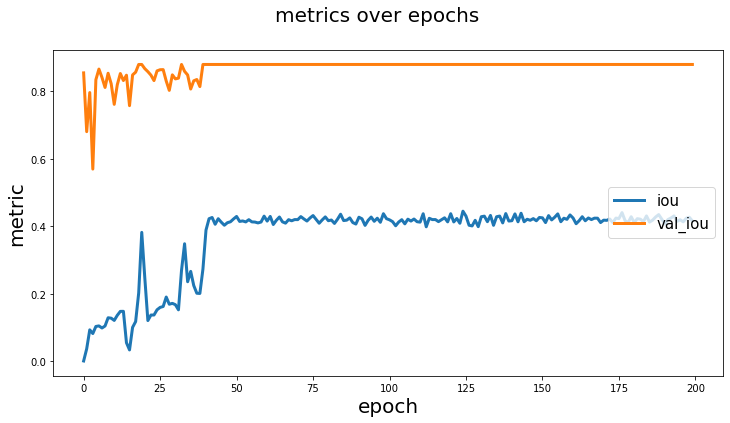

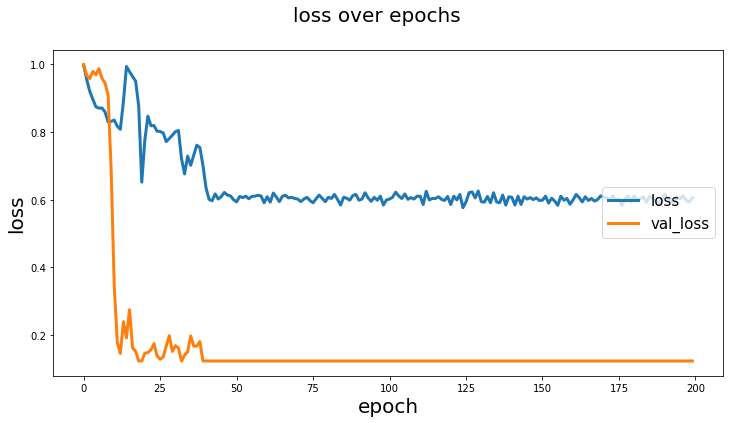

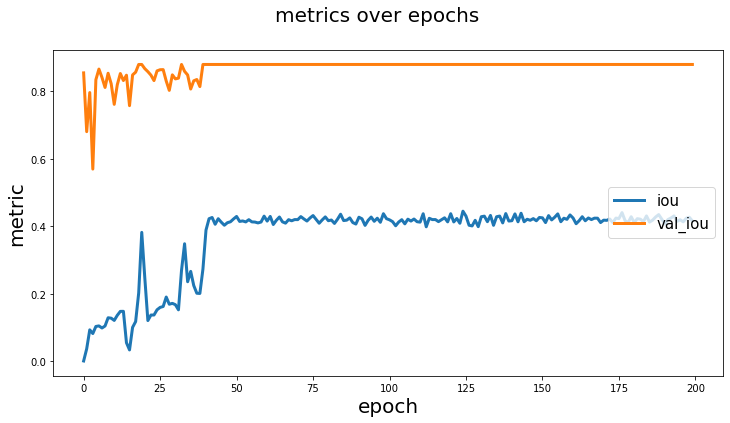

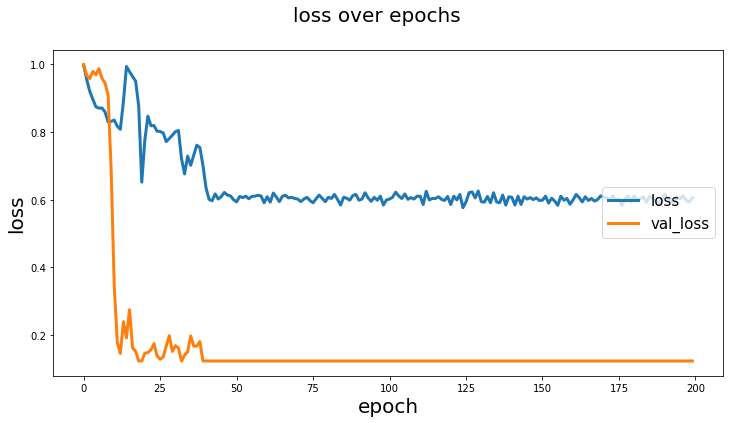

In [34]:
C.Helper.visualize_graph(history)

In [35]:
y_pred = C.Helper.prediction(test_images_array, model)

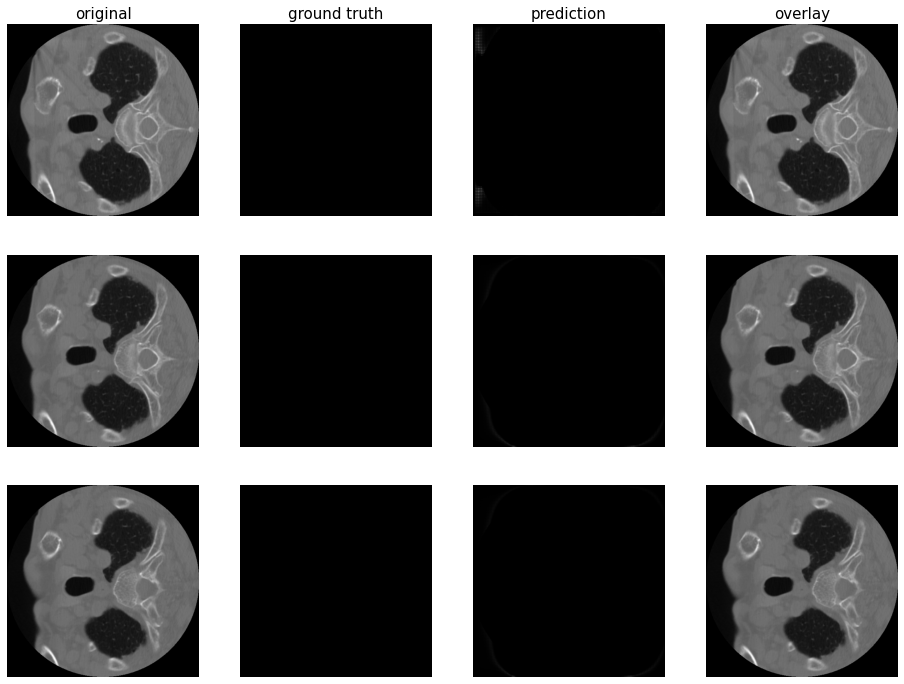

In [36]:
C.Helper.visualize_result(test_images_array, y_test, y_pred)

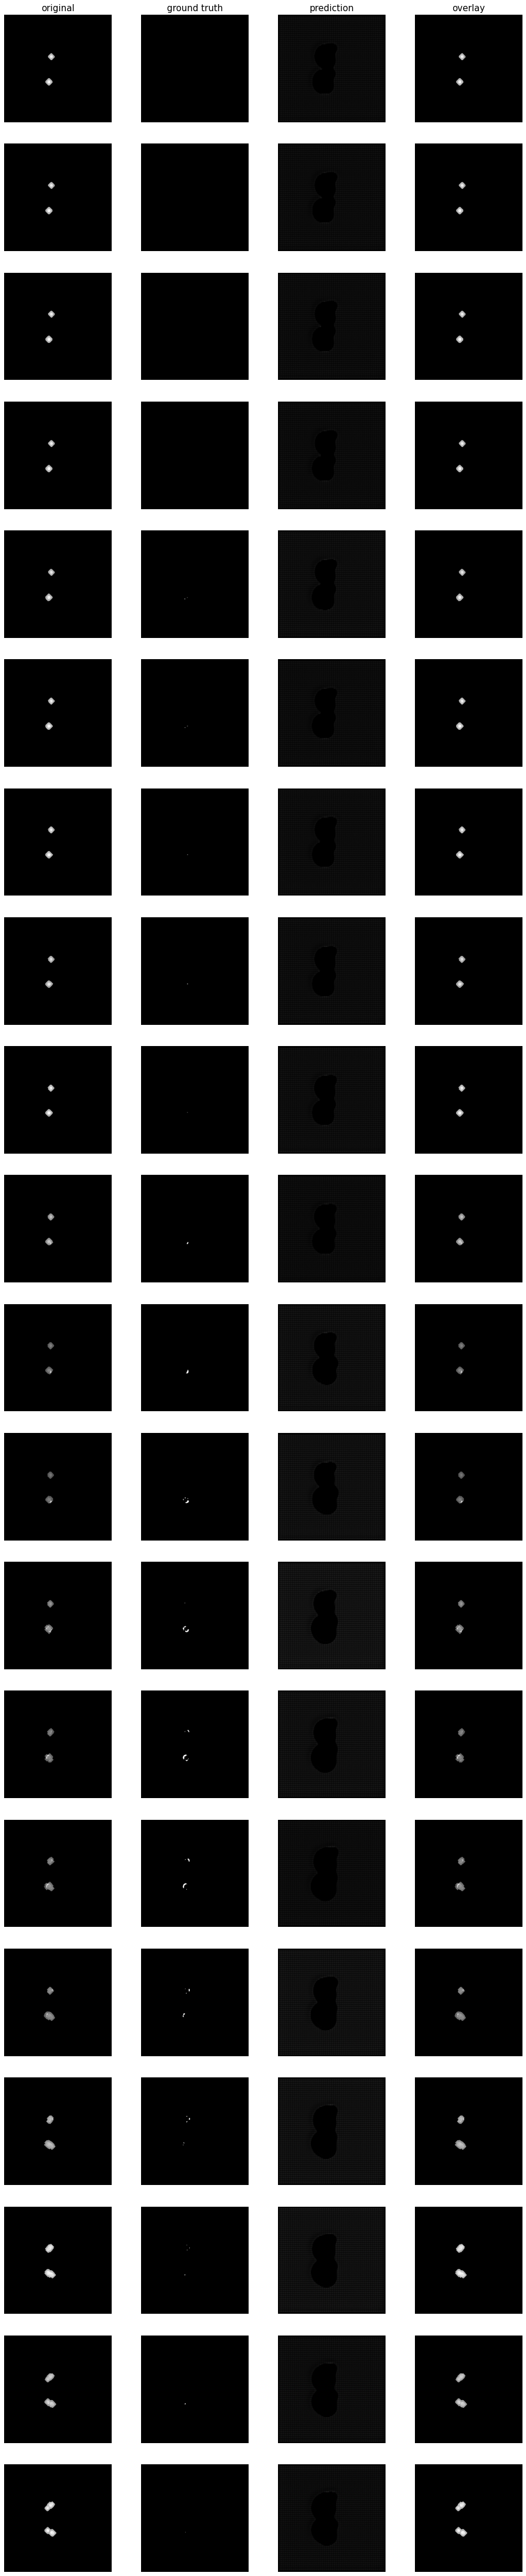

In [51]:
C.Helper.visualize_result_limit(test_images_array, y_test, y_pred, start_index=155, end_index=175)

In [38]:
C.Helper.evaluate(test_images_array, y_test, model)

149/149 [==============================] - 40s 267ms/step - loss: 0.2493 - iou: 0.7555 - iou_thresholded: 0.7555


In [55]:
a = y_pred
a_binary = np.zeros(a.shape, dtype=np.bool_)
a_binary[a > 0.5] = True

In [57]:
a_binary = a_binary.astype(np.float32)

In [58]:
a_binary.dtype

dtype('float32')

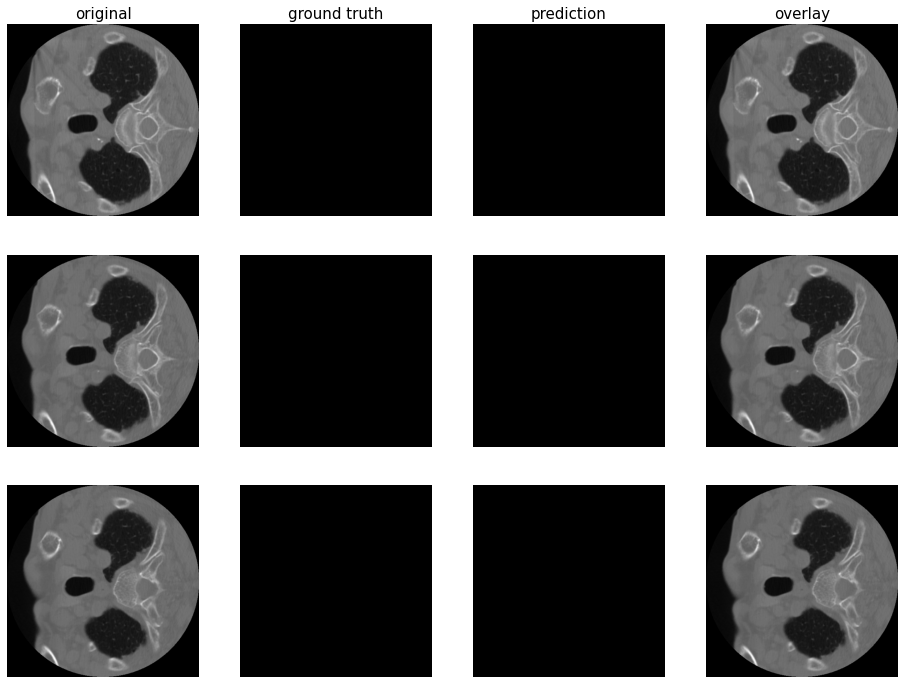

In [44]:
C.Helper.visualize_result(test_images_array, y_test, a_binary)

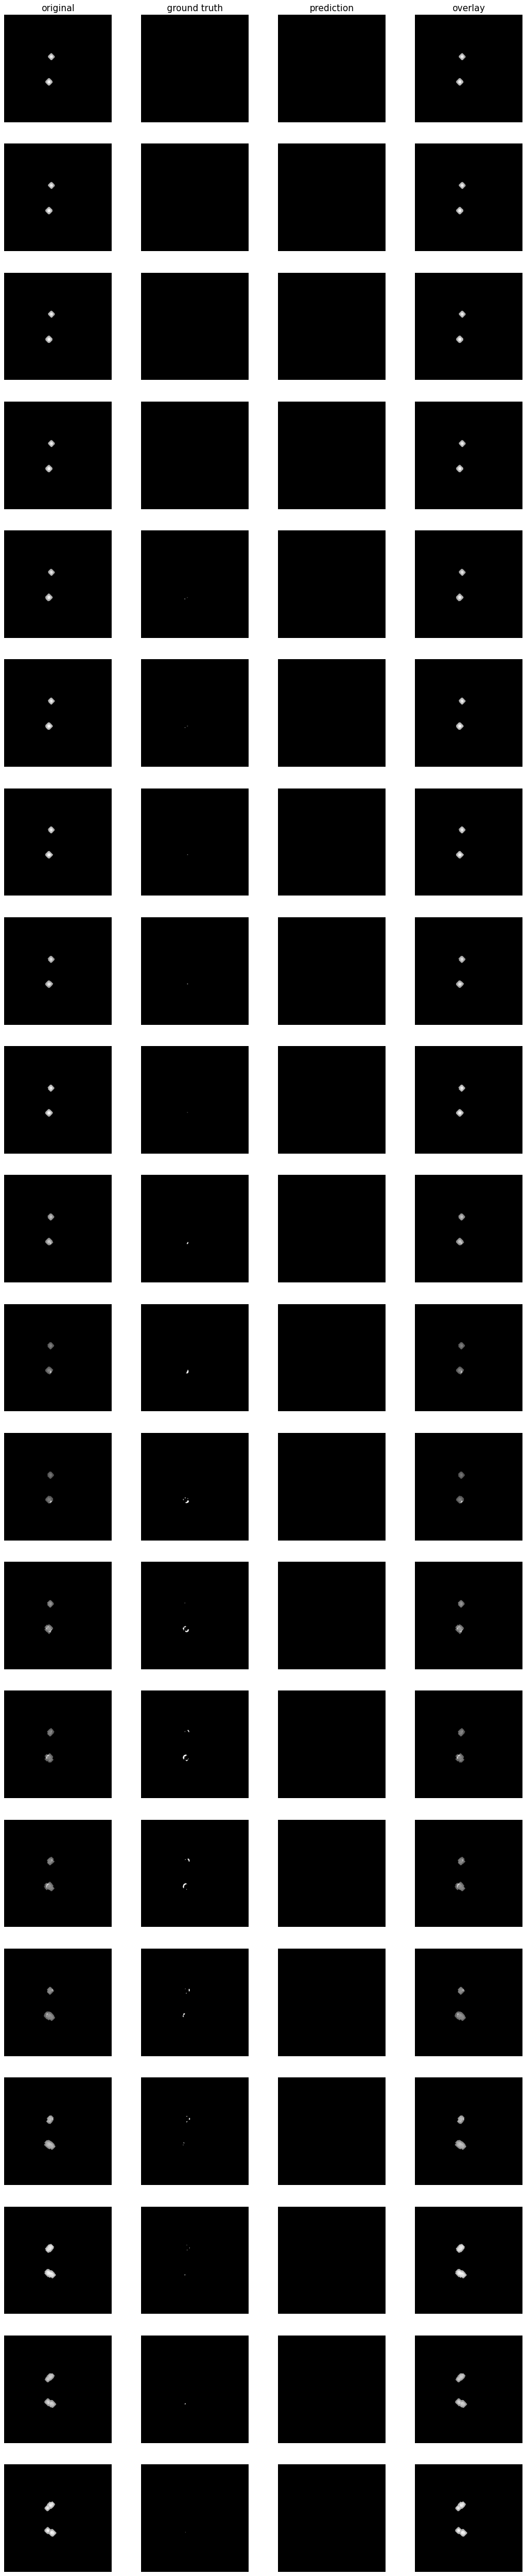

In [52]:
C.Helper.visualize_result_limit(test_images_array, y_test, a_binary, start_index=155, end_index=175)

In [59]:
C.Helper.evaluate(test_images_array, a_binary, model)

149/149 [==============================] - 40s 267ms/step - loss: 0.0000e+00 - iou: 1.0000 - iou_thresholded: 1.0000


In [ ]:
# experiment_data = {
#     'slice_to_patient_mapping': slice_to_patient_mapping,
#     'last_key': last_key,
#     'predictions': y_pred,
#     'y_pred_threshold': a_binary
# }

In [ ]:
# experiment_data_path = 'unet_28/experiment_data.pkl'

In [ ]:
# with open(experiment_data_path, 'wb') as f:
#     pickle.dump(experiment_data, f)